In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
data=pd.read_csv('dataset_water_req.csv')

In [3]:
data.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
0,BANANA,DRY,DESERT,10-20,NORMAL,8.75
1,BANANA,DRY,DESERT,10-20,SUNNY,10.25
2,BANANA,DRY,DESERT,10-20,WINDY,9.65
3,BANANA,DRY,DESERT,10-20,RAINY,0.75
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85


In [7]:
data.tail()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT
2875,ONION,WET,HUMID,30-40,RAINY,0.100
2876,ONION,WET,HUMID,40-50,NORMAL,4.625
2877,ONION,WET,HUMID,40-50,SUNNY,6.125
2878,ONION,WET,HUMID,40-50,WINDY,5.625
2879,ONION,WET,HUMID,40-50,RAINY,0.200


In [9]:
def convert_temperature(temp_range):
    if isinstance(temp_range, str) and '-' in temp_range:
        min_temp, max_temp = map(int, temp_range.split('-'))
        return (min_temp + max_temp) / 2  
    return np.nan

data['AVG_TEMPERATURE'] = data['TEMPERATURE'].apply(convert_temperature)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CROP TYPE          2880 non-null   object 
 1   SOIL TYPE          2880 non-null   object 
 2   REGION             2880 non-null   object 
 3   TEMPERATURE        2880 non-null   object 
 4   WEATHER CONDITION  2880 non-null   object 
 5   WATER REQUIREMENT  2880 non-null   float64
 6   AVG_TEMPERATURE    2880 non-null   float64
dtypes: float64(2), object(5)
memory usage: 157.6+ KB


In [13]:
data.describe()

,WATER REQUIREMENT,AVG_TEMPERATURE
count,2880.000000,2880.000000
mean,5.629891,30.000000
std,3.823782,11.182281
min,0.100000,15.000000
25%,2.700000,22.500000
50%,5.860000,30.000000
75%,8.000000,37.500000
max,21.500000,45.000000


In [15]:
unique_crops = data['CROP TYPE'].unique()
print("Unique Crop Types:", unique_crops)

Unique Crop Types: ['BANANA' 'SOYABEAN' 'CABBAGE' 'POTATO' 'RICE' 'MELON' 'MAIZE' 'CITRUS'
 'BEAN' 'WHEAT' 'MUSTARD' 'COTTON' 'SUGARCANE' 'TOMATO' 'ONION']


In [17]:
unique_soil_types = data['SOIL TYPE'].unique()
print("Unique Soil Types:", unique_soil_types)

Unique Soil Types: ['DRY' 'HUMID' 'WET']


In [19]:
unique_regions = data['REGION'].unique()
print("Unique Regions:", unique_regions)

Unique Regions: ['DESERT' 'SEMI ARID' 'SEMI HUMID' 'HUMID']


In [21]:
unique_weather_conditions = data['WEATHER CONDITION'].unique()
print("Unique Weather Conditions:", unique_weather_conditions)

Unique Weather Conditions: ['NORMAL' 'SUNNY' 'WINDY' 'RAINY']


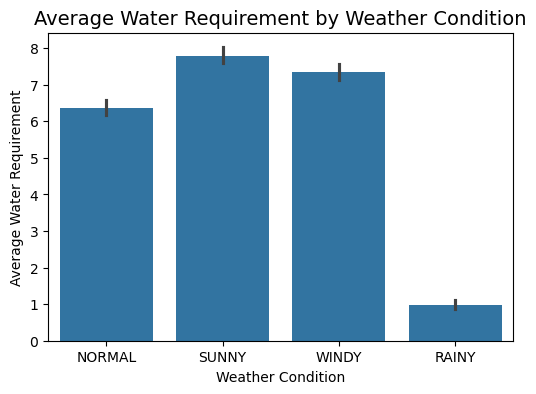

In [23]:
#  Average Water Requirement by Weather Condition
plt.figure(figsize=(6, 4))
sns.barplot(x='WEATHER CONDITION', y='WATER REQUIREMENT', data=data )
plt.title("Average Water Requirement by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Average Water Requirement")
plt.show()


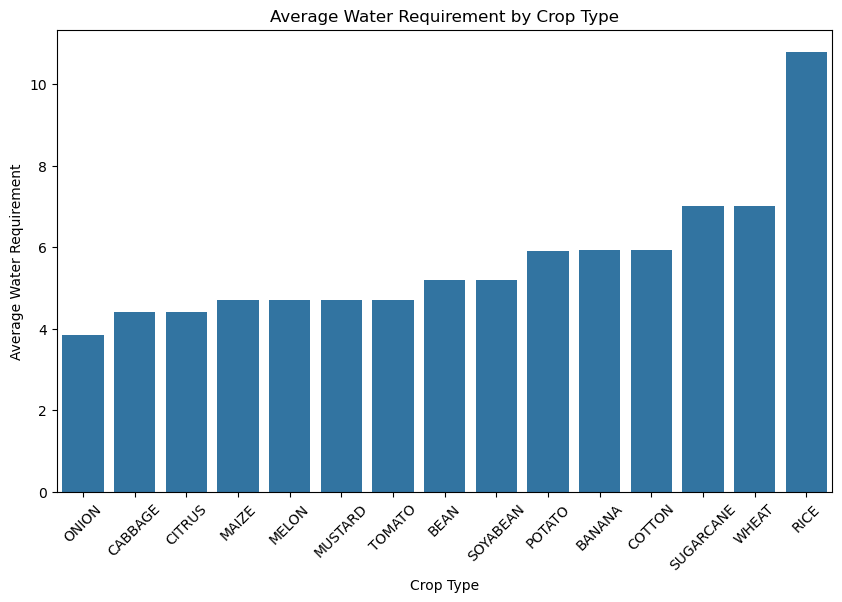

In [25]:
plt.figure(figsize=(10, 6))
avg_water_by_crop = data.groupby('CROP TYPE')['WATER REQUIREMENT'].mean().sort_values()
sns.barplot(x=avg_water_by_crop.index, y=avg_water_by_crop.values)
plt.title("Average Water Requirement by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Water Requirement")
plt.xticks(rotation=45)
plt.show()

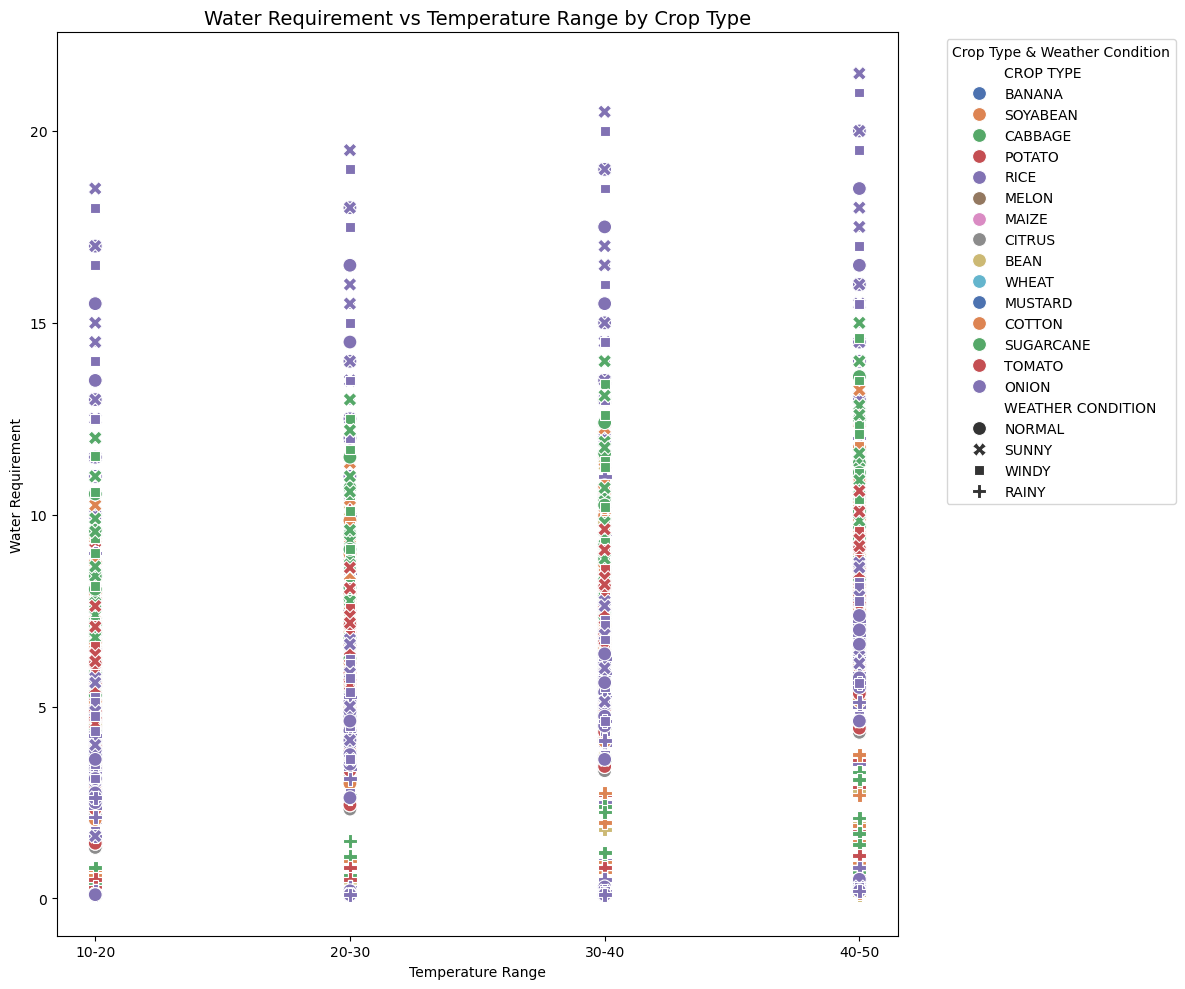

In [27]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=data, x='TEMPERATURE', y='WATER REQUIREMENT', hue='CROP TYPE', style='WEATHER CONDITION', palette="deep", s=100)
plt.title("Water Requirement vs Temperature Range by Crop Type", fontsize=14)
plt.xlabel("Temperature Range")
plt.ylabel("Water Requirement")
plt.legend(title="Crop Type & Weather Condition", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

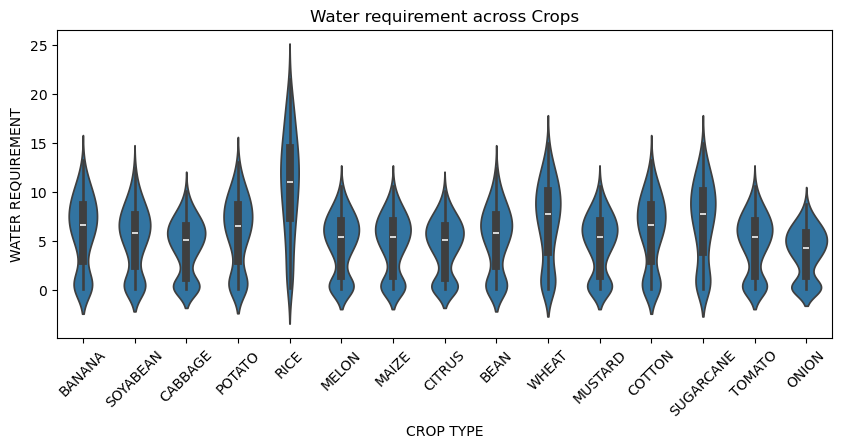

In [29]:
# Violin plot to show the water requirement across different crops
plt.figure(figsize=(10, 4))
sns.violinplot(x='CROP TYPE', y='WATER REQUIREMENT', data=data )
plt.title('Water requirement across Crops')
plt.xticks(rotation=45)
plt.show()

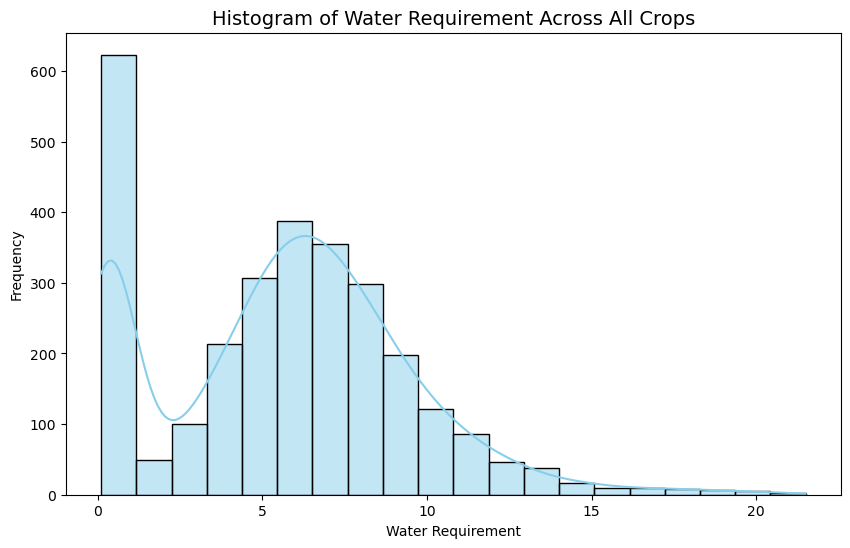

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='WATER REQUIREMENT', bins=20, kde=True, color="skyblue")
plt.title("Histogram of Water Requirement Across All Crops", fontsize=14)
plt.xlabel("Water Requirement")
plt.ylabel("Frequency")
plt.show()

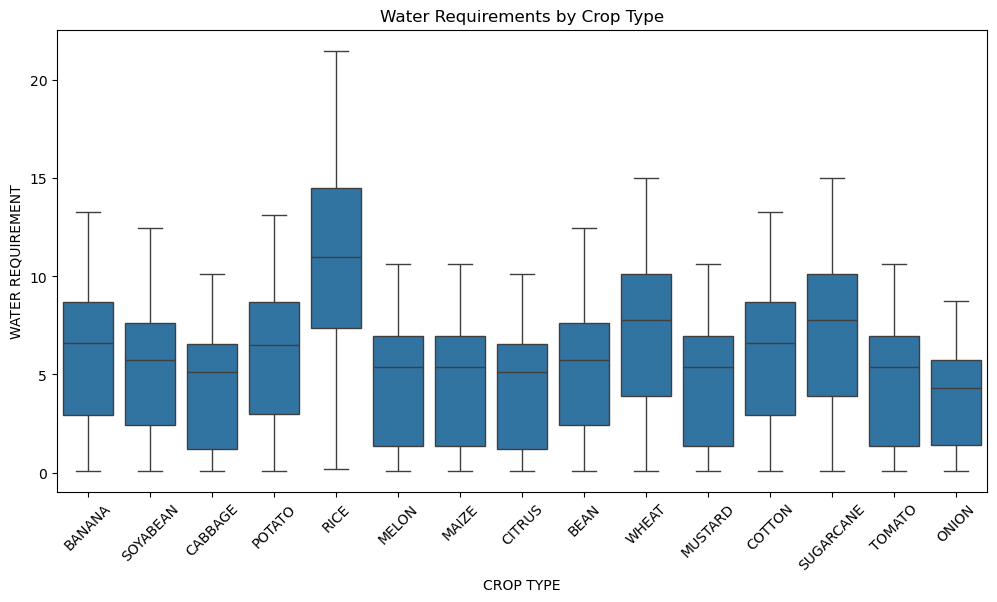

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='CROP TYPE', y='WATER REQUIREMENT', data=data)
plt.title("Water Requirements by Crop Type")
plt.xticks(rotation=45)
plt.show()

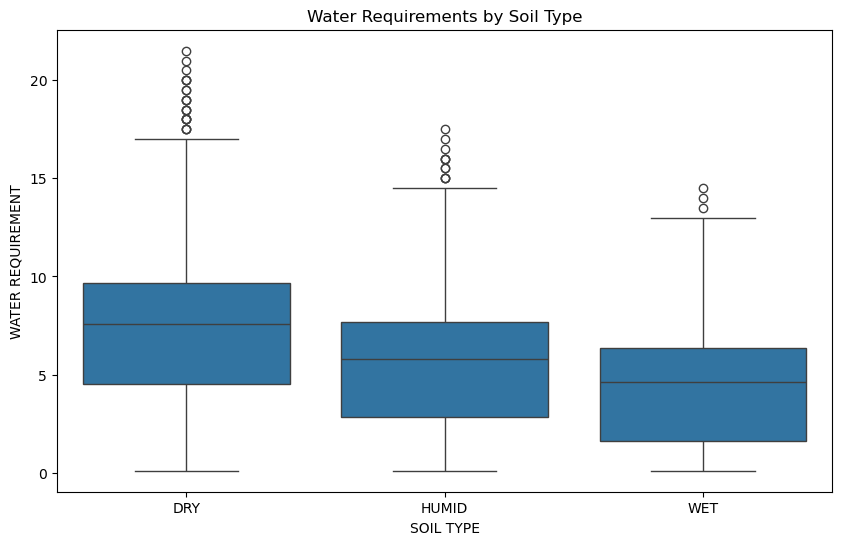

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='SOIL TYPE', y='WATER REQUIREMENT', data=data)
plt.title("Water Requirements by Soil Type")
plt.show()

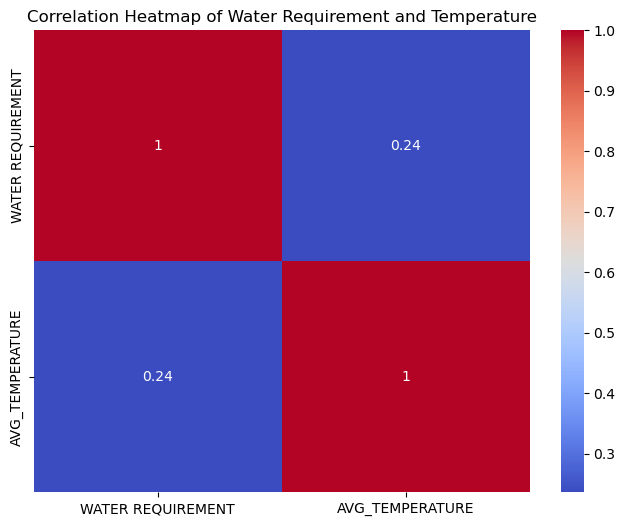

In [37]:
def convert_temperature(temp_range):
    if isinstance(temp_range, str) and '-' in temp_range:
        min_temp, max_temp = map(int, temp_range.split('-'))
        return (min_temp + max_temp) / 2  
    return np.nan
data['AVG_TEMPERATURE'] = data['TEMPERATURE'].apply(convert_temperature)
plt.figure(figsize=(8, 6))
correlation_matrix = data[['WATER REQUIREMENT', 'AVG_TEMPERATURE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Water Requirement and Temperature")
plt.show()

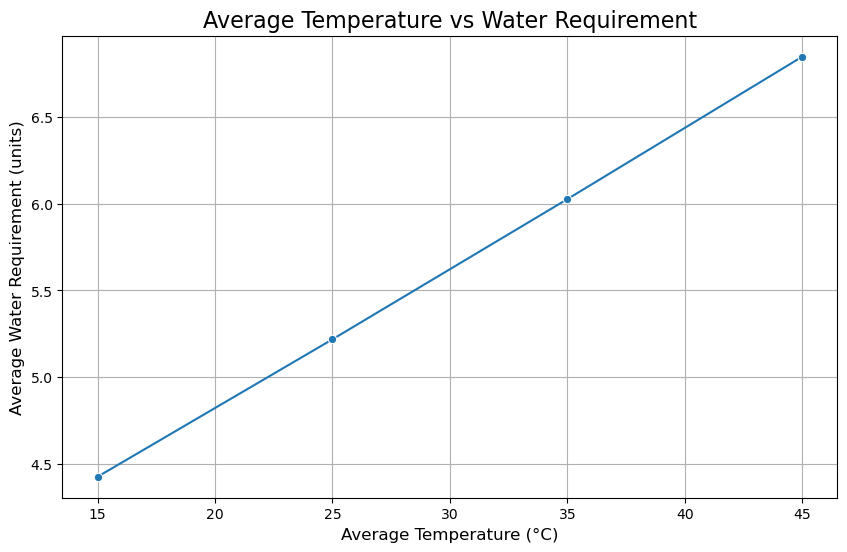

In [39]:
temperature_water_stats = data.groupby('AVG_TEMPERATURE')['WATER REQUIREMENT'].mean().reset_index()
plt.figure(figsize=(10, 6)) 
sns.lineplot(data=temperature_water_stats, x='AVG_TEMPERATURE', y='WATER REQUIREMENT', marker='o')
plt.title('Average Temperature vs Water Requirement', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Average Water Requirement (units)', fontsize=12)
plt.grid(True)
plt.show()

In [41]:
max_value=data['WATER REQUIREMENT'].max()
print("max water requirement : ",max_value)

max water requirement :  21.5


In [43]:
min_value=data['WATER REQUIREMENT'].min()
print("minm water requirement : ",min_value)

minm water requirement :  0.1


In [45]:
data.describe()


,WATER REQUIREMENT,AVG_TEMPERATURE
count,2880.000000,2880.000000
mean,5.629891,30.000000
std,3.823782,11.182281
min,0.100000,15.000000
25%,2.700000,22.500000
50%,5.860000,30.000000
75%,8.000000,37.500000
max,21.500000,45.000000


In [47]:
data.head()

,CROP TYPE,SOIL TYPE,REGION,TEMPERATURE,WEATHER CONDITION,WATER REQUIREMENT,AVG_TEMPERATURE
0,BANANA,DRY,DESERT,10-20,NORMAL,8.75,15.0
1,BANANA,DRY,DESERT,10-20,SUNNY,10.25,15.0
2,BANANA,DRY,DESERT,10-20,WINDY,9.65,15.0
3,BANANA,DRY,DESERT,10-20,RAINY,0.75,15.0
4,BANANA,DRY,DESERT,20-30,NORMAL,9.85,25.0


In [49]:
water_requirement_stats = data.groupby('CROP TYPE')['WATER REQUIREMENT'].agg(['min', 'max', 'mean']).reset_index()
water_requirement_stats.columns = ['CROP TYPE', 'MIN WATER REQUIREMENT', 'MAX WATER REQUIREMENT', 'MEAN WATER REQUIREMENT']
print(water_requirement_stats)

    CROP TYPE  MIN WATER REQUIREMENT  MAX WATER REQUIREMENT  \
0      BANANA                    0.1                  13.25   
1        BEAN                    0.1                  12.45   
2     CABBAGE                    0.1                  10.10   
3      CITRUS                    0.1                  10.10   
4      COTTON                    0.1                  13.25   
5       MAIZE                    0.1                  10.62   
6       MELON                    0.1                  10.62   
7     MUSTARD                    0.1                  10.62   
8       ONION                    0.1                   8.75   
9      POTATO                    0.1                  13.10   
10       RICE                    0.2                  21.50   
11   SOYABEAN                    0.1                  12.45   
12  SUGARCANE                    0.1                  15.00   
13     TOMATO                    0.1                  10.62   
14      WHEAT                    0.1                  1

In [55]:

water_requirement_stats = data.groupby('CROP TYPE')['WATER REQUIREMENT'].agg(['min', 'max', 'mean']).reset_index()

# Function to predict which crops can be grown based on the available water
def predict_crops_based_on_water(available_water):
    # Filter crops that have a mean water requirement less than or equal to the available water
    suitable_crops = water_requirement_stats[water_requirement_stats['mean'] <= available_water]
    
    if suitable_crops.empty:
        return "No crops can be grown with the available water."
    else:
        return suitable_crops[['CROP TYPE', 'mean']]  # Return the crop names and their mean water requirements

try:
    available_water = float(input("Enter the amount of available water (in units): "))
    suitable_crops = predict_crops_based_on_water(available_water)
    print(f"Crops that can be grown with {available_water} units of water:")
    print(suitable_crops)

except ValueError:
    print("Invalid input. Please enter a numerical value for the available water.")


Enter the amount of available water (in units):  6.6


Crops that can be grown with 6.6 units of water:
   CROP TYPE      mean
0     BANANA  5.935599
1       BEAN  5.203229
2    CABBAGE  4.409375
3     CITRUS  4.410208
4     COTTON  5.935599
5      MAIZE  4.695521
6      MELON  4.695521
7    MUSTARD  4.695521
8      ONION  3.847396
9     POTATO  5.910807
11  SOYABEAN  5.203229
13    TOMATO  4.695521


In [57]:
def process_temperature(temp):
    if isinstance(temp, str):  
        try:
            temps = [int(i) for i in temp.split('-')]
            return np.mean(temps)
        except ValueError:
            print(f"Error processing temperature range: {temp}")
            return np.nan
    return temp  

data['TEMPERATURE'] = data['TEMPERATURE'].apply(process_temperature)

# Drop rows with NaN values in case of any temperature processing issues
data = data.dropna()

# Select relevant columns for the model
X = data[['CROP TYPE', 'SOIL TYPE', 'WEATHER CONDITION', 'TEMPERATURE']]
y = data['WATER REQUIREMENT']

# Preprocessing: Encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("crop", OneHotEncoder(), ['CROP TYPE']),
        ("soil", OneHotEncoder(), ['SOIL TYPE']),
        ("weather", OneHotEncoder(), ['WEATHER CONDITION'])
    ],
    remainder="passthrough"
)

# Build a pipeline with preprocessing and linear regression model
model_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model_pipeline.fit(X_train, y_train)

# Function for predicting water requirement based on crop, soil, weather, and temperature
def predict_water_requirement(crop_type, soil_type, weather_condition, temperature):
    input_data = pd.DataFrame({
        "CROP TYPE": [crop_type],
        "SOIL TYPE": [soil_type],
        "WEATHER CONDITION": [weather_condition],
        "TEMPERATURE": [temperature]
    })
    predicted_water_requirement = model_pipeline.predict(input_data)
    return predicted_water_requirement[0]


example_prediction = predict_water_requirement("RICE", "DRY", "SUNNY", 45)  
print("Predicted Water Requirement:", example_prediction)


y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)


Predicted Water Requirement: 15.529993486130923
Mean Squared Error (MSE): 2.7760332487333503
Mean Absolute Error (MAE): 1.1992543718408113
R-squared (R²): 0.8267592192662538
